# This is just a copy of TensorFlow's [web page](https://www.tensorflow.org/get_started/get_started).  

## A simple visualization function is added to show what images got mis-classified.


## [Introduction](https://www.tensorflow.org/versions/r0.10/get_started/)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

# Create 100 phony x, y data points in NumPy around, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 * np.random.uniform(0.9, 1.1, 100) + 0.3

In [2]:
tf.__version__

'1.0.0'

In [3]:
pd.Series(y_data).describe()  
# np.random.uniform(0.9, 1.1, 5)

count    100.000000
mean       0.349631
std        0.028327
min        0.302079
25%        0.325263
50%        0.348026
75%        0.374215
max        0.399735
dtype: float64

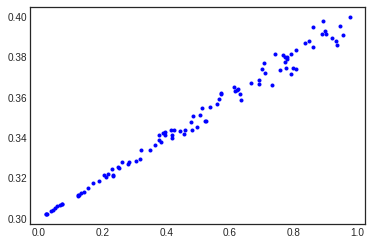

In [4]:
plt.plot(x_data, y_data, 'bo', markersize=3)

In [5]:
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but TensorFlow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

y = W * x_data + b

In [6]:
# See what "tf.random_uniform" operation does 
sess = tf.InteractiveSession()
tf.random_uniform([5], -1, 1).eval()

array([ 0.24824357,  0.81917167,  0.9435215 , -0.13433576, -0.31526518], dtype=float32)

In [7]:
# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)   # learning rate=0.5
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(401):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

# Learns best fit is W: [0.1], b: [0.3]
sess.close()

0 [-0.10544792] [ 0.5588268]
20 [ 0.02562553] [ 0.33938783]
40 [ 0.07949133] [ 0.31097651]
60 [ 0.09451763] [ 0.30305091]
80 [ 0.09870934] [ 0.30084002]
100 [ 0.09987867] [ 0.30022326]
120 [ 0.10020487] [ 0.30005121]
140 [ 0.10029584] [ 0.30000323]
160 [ 0.10032123] [ 0.29998982]
180 [ 0.10032829] [ 0.29998612]
200 [ 0.10033029] [ 0.29998505]
220 [ 0.10033083] [ 0.29998475]
240 [ 0.10033093] [ 0.29998472]
260 [ 0.10033093] [ 0.29998472]
280 [ 0.10033093] [ 0.29998472]
300 [ 0.10033093] [ 0.29998472]
320 [ 0.10033093] [ 0.29998472]
340 [ 0.10033093] [ 0.29998472]
360 [ 0.10033093] [ 0.29998472]
380 [ 0.10033093] [ 0.29998472]
400 [ 0.10033093] [ 0.29998472]


<hr>

## [MNIST For ML Beginners](https://www.tensorflow.org/get_started/mnist/beginners)

**The MNIST data** is split into three parts: 55,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation).

Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers. We can flatten this array into a vector of 28x28 = 784 numbers. 

In [8]:
"""A very simple MNIST classifier.
See extensive documentation at
http://tensorflow.org/tutorials/mnist/beginners/index.md
"""

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import tensorflow as tf

x = tf.placeholder(tf.float32, [None, 784])  # x : input. variable size.

W = tf.Variable(tf.zeros([784, 10]))  # Here, Wjk means weight from j to k 

b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)   # y : (?, 10) shape

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
type(mnist.train.images), type(mnist.train.labels)

(numpy.ndarray, numpy.ndarray)

In [10]:
mnist.train.images.shape, mnist.train.labels.shape, mnist.test.images.shape, mnist.test.labels.shape

((55000, 784), (55000, 10), (10000, 784), (10000, 10))

--> Note that the each image in the matrix is placed in a row. 

In [11]:
pd.Series(mnist.train.images[1000]).describe()
# each image is composes of 784 pixels with the following (typical) statistics

count    784.000000
mean       0.131398
std        0.305863
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

### A simple function to visualize the mnist digit. 

In [12]:
def view_digit(category, index, pred_label=-1):
    """
    category : pass whether the digit is 'test', 'train', or 'validation'
    index : the index of the digit
    pred_label : show 'pred_label' if passed.
    """
    if category not in ['test', 'train', 'validation']:
        return("You should specify one of ['test', 'train', 'validation']" )
    elif category == 'train' and index < 55000:
        image = mnist.train.images[index]
        label = np.argmax(mnist.train.labels[index])
    elif category == 'test' and index < 10000:
        image = mnist.test.images[index] 
        label = np.argmax(mnist.test.labels[index])
    elif category == 'validation' and index < 5000:
        image = mnist.validation.images[index]
        label = np.argmax(mnist.validation.labels[index])
    else:
        return("index out of range")
    
    image = image.reshape((28,28))
    if pred_label>=0 and pred_label<=9:
        plt.title('True : %s,    Predict : %s' % (label, pred_label))
    else:
        plt.title('Label : %s' % (label))
    plt.imshow(image, cmap='gray', interpolation="spline16")
    plt.show()   

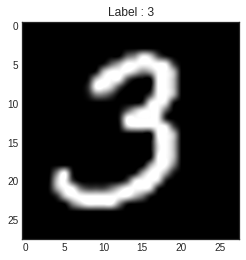

In [13]:
view_digit('validation', 3233)

## Training
- y: prediction,  shape: (?, 10)
- y_ : placeholder holding true value, shape: (?, 10)

First, tf.log computes the logarithm of each element of y. Next, we multiply each element of y_ with the corresponding element of tf.log(y). Then tf.reduce_sum adds the elements in the second dimension(row-wise) of y, due to the reduction_indices=[1] parameter. Finally, tf.reduce_mean computes the mean over all the examples in the batch.

In [14]:
y_ = tf.placeholder(tf.float32, [None, 10])  # y_ : holds true value (One-hot encoding)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# Use cross_entropy cost(loss) function
# reduction_indices : deprecated. The same as axis.  axis=1 : means sum row-wise.  
# y_ * tf.log(y) : element-wise multiplication.  

In [15]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

- 55000 trainset image 중에 100개를 무작위 추출해 train_step을 1000번 돌림. 한 Epoch에 mini-batch size 100개로 하여 non-overlapping minibatch 550번 돌리는 것이 아님.
- mini-batch 한 번 돌릴 때 마다 train_step이 실행되고, cross_entropy가 조금 작아지며, 이는 W와 b를 변경하면서 이루어짐. 동시에 y가 계산됨.  즉, mini-batch 한 번 할 때마다 y가 새로 계산되고, y는 100x10 matrix 일 것임.  

### Model is fit.  Let's see the how the weights pattern look like

(784, 10)


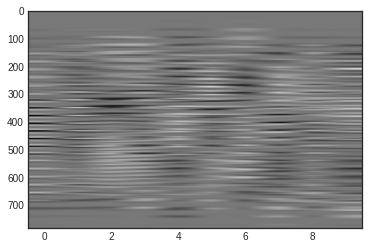

In [16]:
print(W.eval().shape)
plt.imshow(W.eval(), cmap='gray', interpolation="spline16", aspect='auto')

In [17]:
pd.Series(W.eval().reshape([-1])).describe()

count    7.840000e+03
mean     8.957749e-09
std      1.246444e-01
min     -6.628650e-01
25%     -3.898058e-02
50%     -1.151287e-04
75%      3.510296e-02
max      7.463571e-01
dtype: float64

### Test Set Evaluation 
- Note that W and b are fit.
- We are not calling 'train_step' that does optimization and thus no W, b updates.

In [18]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))  # y: predictions 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# accuracy is calculated with the learned W, b.

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9183


### Visualize some images that are misclassified.

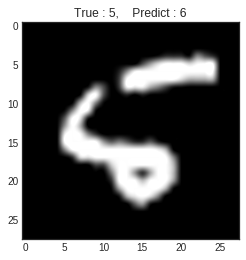

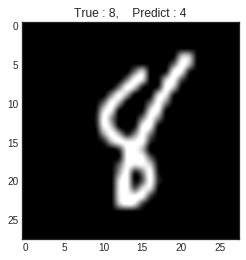

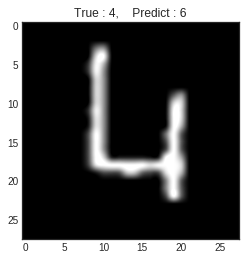

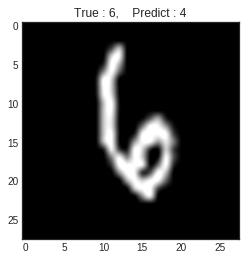

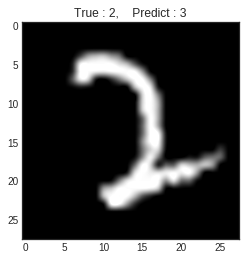

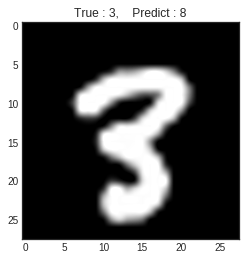

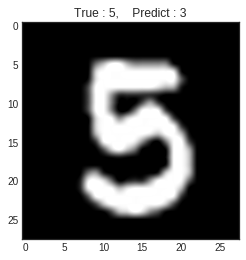

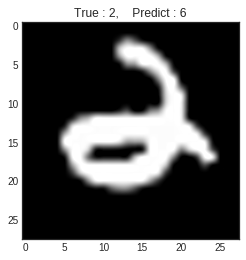

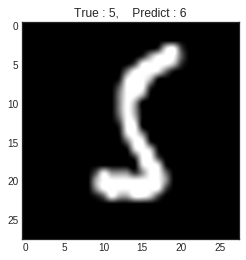

In [19]:
predictions = tf.argmax(y,1).eval(feed_dict={  
    x: mnist.test.images})  # label predictions for test set

result = correct_prediction.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels})

misses = [i for i, x in enumerate(result) if not x]
corrects = [i for i, x in enumerate(result) if x]
# 1 - (len(misses)/10000)

for i in range(0, len(misses), 100):
    view_digit('test', misses[i], predictions[misses[i]])

### Show some of the correctly classified instances

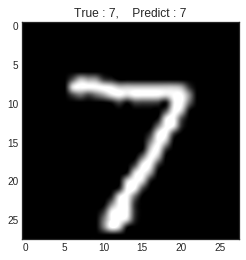

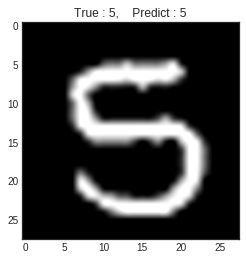

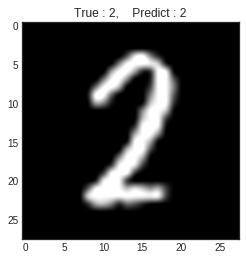

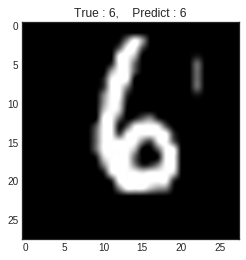

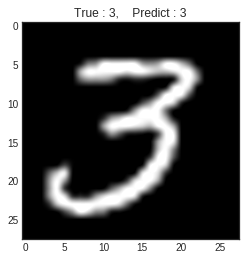

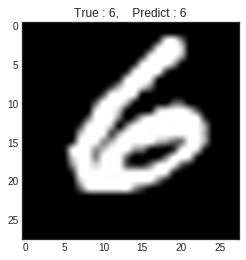

In [20]:
for i in range(0, len(corrects), 1700):
    view_digit('test', corrects[i], predictions[corrects[i]])

In [21]:
sess.close()

<br>
<br>

## View the user defined variables

In [22]:
whos

Variable             Type                        Data/Info
----------------------------------------------------------
W                    Variable                    Tensor("Variable_2/read:0<...>(784, 10), dtype=float32)
accuracy             Tensor                      Tensor("Mean_2:0", shape=(), dtype=float32)
b                    Variable                    Tensor("Variable_3/read:0<...>ape=(10,), dtype=float32)
batch_xs             ndarray                     100x784: 78400 elems, type `float32`, 313600 bytes (306.25 kb)
batch_ys             ndarray                     100x10: 1000 elems, type `float64`, 8000 bytes
correct_prediction   Tensor                      Tensor("Equal:0", shape=(?,), dtype=bool)
corrects             list                        n=9183
cross_entropy        Tensor                      Tensor("Mean_1:0", shape=(), dtype=float32)
i                    int                         8500
init                 Operation                   name: "init"\nop: "NoOp"\<..

In [23]:
del(W, x, y, y_, b)  # delete the variables 

-------------------------

## [Deep MNIST for Experts](https://www.tensorflow.org/tutorials/mnist/pros/)

The common usage for TensorFlow programs is to **first create a graph and then launch it in a session. **

Here we instead use the convenient InteractiveSession class, which makes TensorFlow more flexible about how you structure your code. It allows you to interleave operations which build a computation graph with ones that run the graph. This is particularly convenient when working in interactive contexts like IPython. If you are not using an InteractiveSession, then you should build the entire computation graph before starting a session and launching the graph.

### Use Interactive Session

In [24]:
sess = tf.InteractiveSession()    # launch a new session in Interactive mode

In [25]:
x = tf.placeholder(tf.float32, shape=[None, 784])  # Placeholder for inputs
y_ = tf.placeholder(tf.float32, shape=[None, 10])  # Placeholder for True labels

W = tf.Variable(tf.ones([784,10]))
b = tf.Variable(tf.ones([10]))

Before Variables can be used within a session, they must be initialized using that session.

In [26]:
sess.run(tf.global_variables_initializer())

### Define the model, and cost function

In [27]:
y = tf.matmul(x, W) + b    # y : predicted response

# Define cross_entropy cost function
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

### Train the model
- add a new operation (train_step) to the computation graph
- It computes gradients, parameter parameter update steps, and updates the parameters (W, b variables)
- The returned operation train_step, when run, will apply the gradient descent updates to the parameters. Training the model can therefore be accomplished by repeatedly running train_step.
-  Note that you can replace any tensor in your computation graph using feed_dict -- it's not restricted to just placeholders.

In [28]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [29]:
for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

### Evaluate the Model

In [30]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))                          

0.92


That was the repeat of the "MNIST for ML Beginners"
<br>
<br>

# Build a Multilayer Convolutional Network

### Weight Initialization

In [31]:
def weight_variable(shape):    # shape : shape of a tensor 
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

### Convolution and Pooling 
- Stride of 1
- zero padded so that output is the same size as the input (padding='SAME') : SAME size as input. 
- max_pool의 [padding](http://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t)
- max pooling over 2x2 blocks

In [32]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


### First Convolutional Layer
- It will consist of convolution, followed by max pooling. zero padded, so the output size is the same as input
- The convolution will compute 32 features

In [33]:
W_conv1 = weight_variable([5, 5, 1, 32])  # 5x5 window, 1 input channel, 32 filters(output channels) 
b_conv1 = bias_variable([32])

In [34]:
print(W_conv1)   # print the shape of W_conv1

Tensor("Variable_6/read:0", shape=(5, 5, 1, 32), dtype=float32)


In [35]:
print(b_conv1)

Tensor("Variable_7/read:0", shape=(32,), dtype=float32)


In [36]:
# reshape x to a 4d tensor
x_image = tf.reshape(x, [-1,28,28,1])

In [37]:
x_image

<tf.Tensor 'Reshape_3:0' shape=(?, 28, 28, 1) dtype=float32>

Note the shape of x_image. It's a rank 4 tensor. The first dimension tells the number of images, 2nd and 3rd tell row & column size of the image, 4'th tells the number of channels


We then convolve x_image with the weight tensor, add the bias, apply the ReLU function, and finally max pool. The max_pool_2x2 method will reduce the image size to 14x14.

In [38]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [39]:
print(h_conv1)

Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)


In [40]:
print(h_pool1)

Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


Output of the First convolution layer is ***h_pool1*** with 14x14 size with 32 channels. Note that the first dimension is '?' saying that there can be any number of 28x28x32 maps. This is due to x_image having '?' at its first dimension.
<br>
<br>

### Second Convolutional Layer
- 64 features(channels) for each 5x5 patch

In [41]:
W_conv2 = weight_variable([5, 5, 32, 64])  # filter size 5x5, on 32 input channels, will output in 64 channels (filters)
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [42]:
print(h_conv2)

Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)


--> Shape of h_conv2 is 14x14: because conv2d has padding='same' and h_pool1 is 14x14

In [43]:
print(h_pool2)

Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


The output of the second convolution layer ***h_pool2*** has the image size of 7x7 with 64 channels (feature maps)
<br>

### Densely Connected Layer

Now that the image size has been reduced to 7x7, we add a fully-connected layer with 1024 neurons to allow processing on the entire image. We reshape the tensor from the pooling layer into a batch of vectors, multiply by a weight matrix, add a bias, and apply a ReLU.

In [44]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [45]:
print(h_fc1)

Tensor("Relu_2:0", shape=(?, 1024), dtype=float32)


-> Now each input image is reduced to a vector of 1024 size

### Dropout
TensorFlow's **tf.nn.dropout** op automatically handles scaling neuron outputs in addition to masking them, so dropout just works without any additional scaling

In [46]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

### Readout Layer

In [47]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

### Train and Evaluate the Model

In [48]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())

for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%1000 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print()
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))


step 0, training accuracy 0.04
step 1000, training accuracy 0.98
step 2000, training accuracy 0.98
step 3000, training accuracy 1
step 4000, training accuracy 1
step 5000, training accuracy 1
step 6000, training accuracy 1
step 7000, training accuracy 0.98
step 8000, training accuracy 1
step 9000, training accuracy 0.98
step 10000, training accuracy 1
step 11000, training accuracy 1
step 12000, training accuracy 1
step 13000, training accuracy 0.98
step 14000, training accuracy 1
step 15000, training accuracy 1
step 16000, training accuracy 1
step 17000, training accuracy 1
step 18000, training accuracy 1
step 19000, training accuracy 1

test accuracy 0.9916


### Visualize some of the mis-classified images

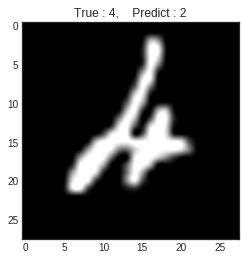

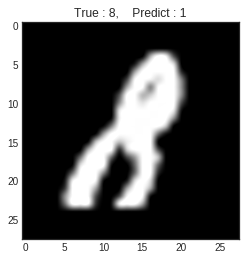

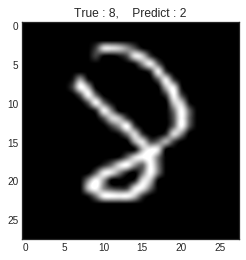

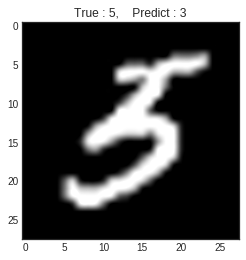

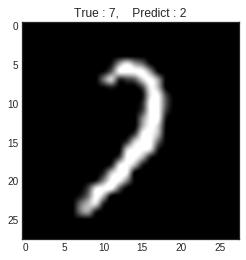

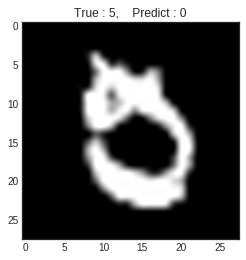

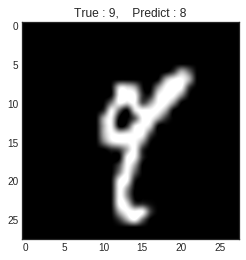

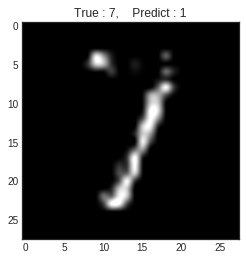

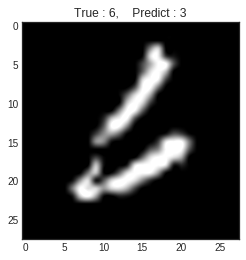

In [49]:
predictions = tf.argmax(y_conv,1).eval(feed_dict={  
    x: mnist.test.images, keep_prob: 1.0})  # label predictions for test set

result = correct_prediction.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})

misses = [i for i, x in enumerate(result) if not x]
corrects = [i for i, x in enumerate(result) if x]

for i in range(0, len(misses), 10):
    view_digit('test', misses[i], predictions[misses[i]])

In [50]:
print('exit 0')

exit 0
